# Bayesian analysis and modern machine learning algorithms applied for soil and rock probabilistic characterization 

## Introduction

Modern programming languages made easier the use of statistical analysis of large amount of data. 
The Bayesian analysis is helpful to update knowledge of something.
Is particularly indicated when we have to deal with classification. 
This is why it is helpful when appled to geotechnical material.
The instrument we are going to use is pandas packages under python code for what concern the data manipulation.
The sklearn package and in particular SNN classification will be used in order to verify the omogeneity of the selected sample with respect to the other material obtained from other sample.
Successively we are going to use the package pcm3 for the bayesian analysis
An online database by means of Mysql open source will keep storage of the soil material and will be helpful for future analyis.
The criteria of storing data will be also the geografical area linked to climate and geological period, local atmosfere (lake, sea, desertic) and load history. This will be helpful to assimilate similar soil.



## Python packages to deal with data

We will make extensive use of Pandas packages to deal with data. This packages offer the peculiarity to communicate with a huge amount of data protocols like html, json, xls, db, csv and is constantly update to accomodate recent development like supporting the hdf format that is a development of the csv format but much faster and disk space optimization.
The following code show how this package will be use to upload data from the excel file.

In [1]:
#newenv1
#!/usr/bin/env conda run -n pymc3venv python
import sys
print(sys.executable)    ### Shoul be this C:\ProgramData\Anaconda3_1\envs\pymc3venv\python.exe

C:\ProgramData\Anaconda3_1\envs\pymc3venv\python.exe


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
#!conda install --yes --prefix {sys.prefix} m2w64-toolchain
# after it add to PATH
# ...Anaconda3\pkgs\m2w64-gcc-5.3.0-6\Library\mingw-w64\bin

In [ ]:
# nota pymc3 requires an old version of numpy to work --> No with 1.16.5 is working
# Install a conda package in the current Jupyter kernel
# !conda install --yes --prefix {sys.prefix} numpy==1.15.0

In [28]:
# !conda install --yes --prefix {sys.prefix} pymc3

In [3]:
import pandas as pd
# we set pandas options in order to enlarge the row/columns visualization
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np

In [55]:
# Import matplotlib for graphs
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

from IPython.core.pylabtools import figsize

import seaborn as sns

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats
from cycler import cycler

In [46]:
s = json.load(open("../plot_styles/bmh_matplotlibrc_2.json"))

In [49]:
matplotlib.rcParams.update(s)

C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]


In [58]:
default_cycler = (cycler(color=["#348ABD",
    "#A60628",
    "#7A68A6",
    "#467821",
    "#CF4457",
    "#188487",
    "#E24A33"]))

plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=default_cycler)

In [5]:
# Standard ML Models for comparison
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import ElasticNet
from sklearn.ensemble               import RandomForestRegressor
from sklearn.ensemble               import ExtraTreesRegressor
from sklearn.ensemble               import GradientBoostingRegressor
from sklearn.svm                    import SVR

from sklearn                        import metrics, svm
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from sklearn.ensemble               import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [7]:
# PyMC3 for Bayesian Inference
import pymc3 as pm

In [27]:
print(pm.__version__)

3.6


In [29]:
import json

Open Xlsx file

In [11]:
xls = pd.ExcelFile('geotech1.xlsx')
sheetsls = xls.sheet_names
print(sheetsls)
df1 = pd.read_excel(xls, sheetsls[0])
df1.head(2)

['Caratt_Compl']


,CODE,BH,Z1,Z2,Zm,"Zarr0,25",Descr_Geo,UG,G,S,L,C,Col,Zw,Kperm,INDEX,USCS Class,σ'v,gwet,gdry,gsat,gopt,wn,wopt,CaCo3,Sr,LL,PL,PI,Ic,OED,σ'vOED,σ'VTX,σ'p,σ'pTX,OCROED,OCR s'v,OCRTX,e0,e0TX,Cc,Ce,Ce/Cc,CR,SR,av1-2,av,mjambu,mv,M,Ip,n,E',Eu,Cv,Unnamed: 55,SPT,NSPT,N60,j'SPT,CN,(N1)60,Unnamed: 62,TX,cTX,jTX,c'TX,j'TX,ccyc,jcyc,Cu,s'p,OCR,Unnamed: 73,Unnamed: 74,DSS,cDSS,jDSS,c'DSS,j'DSS,cr'DSS,jr'DSS,ϕ' (IP),ϕr (LL),ϕr (CF),VANE,"CU,VAN,REM","CU,VANE",σ'v.1,Ip.1,WL,σ'p.1,OCR.1,s'pFVT,OCRFVT,OCRVANE,"CU,VANE,C","CU,TX","CU,SPT",PMT,Ep1,Ep2,Er,Pl,Em/Pl,Validity,WL.1,WP,PI.1,"Vane,re",Vane,SPT.1,"CU,SPT.1","Cu,PMT",E'PMT,c'PMT,j'IP,Unnamed: 117,Unnamed: 118,UCS,ucs,"Cu,Ucs",Ca++,Mg++,K+,TDS,"Na, %",SAR
0,611,NaN,m,m,m,m,NaN,NaN,%,%,%,%,NaN,NaN,m/s,NaN,NaN,[kPa],NaN,NaN,NaN,NaN,NaN,NaN,NaN,%,%,%,%,NaN,NaN,[kPa],NaN,[kPa],[kPa],[-],[-],[-],[-],[-],[-],[-],NaN,NaN,NaN,[MPa],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[m2/yr],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,°,°,°,NaN,NaN,NaN,[kPa],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mpa,Mpa,Mpa,Mpa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Wn PL e LL stime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create a DataFrame by cleaning all missing data

In [12]:
df=df1.copy()
df.columns=df.columns+' '+df.iloc[0,:].astype('str')
df.columns = df.columns.str.replace('nan','')
df.columns = df.columns.str.replace(' 611','')
df.columns = df.columns.str.replace("'",'^')
df.columns = df.columns.str.replace("%",'[p]')
df.columns = df.columns.str.replace("j",'ϕ')
df.drop([0,1], axis='rows', inplace=True)
df.dropna(axis='columns', thresh=5, inplace=True)
df.dropna(axis='rows', thresh=9, inplace=True)

# Select the desired columns

df=df[['Zarr0,25 m','σ^v [kPa]', 'gwet ', 'wn ', 'wopt ', 'CaCo3 ',
       'Sr [p]', 'LL [p]', 'PI [p]', 'Ic ', 'OCROED [-]', 'OCRTX [-]',
       'e0 [-]', 'Cc [-]', 'Ce [-]', '(N1)60 ',
       'cTX ', 'ϕTX ', 'c^TX ', 'ϕ^TX ', 'Cu ', 'OCR ',
       'cDSS ', 'ϕDSS ', 'CU,VANE ', 'Ep1 Mpa', 'Pl Mpa', 'Em/Pl ', 'WL.1 ', 'PI.1 ',
       'Cu,Ucs ']]

# correct the columns name

df.columns = df.columns.str.replace(" ",'_')
df.columns = df.columns.str.replace('\[-\]$','')
df.columns = df.columns.str.replace('_$','')

# correct the column type and plot statistics

df=df.astype('float')
df.describe()


,"Zarr0,25_m",σ^v_[kPa],gwet,wn,wopt,CaCo3,Sr_[p],LL_[p],PI_[p],Ic,OCROED,OCRTX,e0,Cc,Ce,(N1)60,cTX,ϕTX,c^TX,ϕ^TX,Cu,OCR,cDSS,ϕDSS,"CU,VANE",Ep1_Mpa,Pl_Mpa,Em/Pl,WL.1,PI.1,"Cu,Ucs"
count,596.000000,596.000000,65.000000,148.000000,6.000000,10.000000,27.000000,136.000000,136.000000,66.000000,31.000000,26.000000,37.000000,32.000000,32.000000,268.000000,29.000000,29.000000,36.000000,36.000000,26.000000,26.000000,5.000000,5.000000,58.000000,42.000000,42.000000,42.000000,31.000000,31.000000,8.000000
mean,20.061242,227.917911,17.852769,32.136696,19.583333,30.817000,0.961852,73.522059,43.404412,0.709168,2.712903,3.571991,1.167946,0.450594,0.081656,15.062256,46.965517,17.172414,30.833333,24.777778,186.439666,3.571991,22.600000,13.600000,253.327586,13.766667,0.721905,28.477894,78.612903,46.709677,163.668750
std,13.811707,127.204534,0.979376,16.924352,1.734839,7.983576,0.043504,16.601636,13.290140,0.214630,1.259826,2.130319,0.233693,0.170711,0.032962,9.284723,28.031211,4.480665,24.961113,5.483019,73.251474,2.130319,16.682326,2.701851,134.300186,9.782679,0.545175,32.095831,13.169858,10.096843,68.002825
min,0.750000,13.500000,13.340000,0.270000,16.700000,20.000000,0.810000,31.000000,11.000000,-0.250000,1.000000,1.347558,0.623000,0.098000,0.001000,5.081337,5.000000,9.000000,0.000000,17.000000,68.744449,1.347558,5.000000,9.000000,23.000000,1.900000,0.150000,7.142857,58.000000,30.000000,38.950000
25%,8.500000,123.843750,17.460000,27.850000,18.775000,25.647500,0.950000,65.000000,34.000000,0.614560,2.000000,2.069353,0.991000,0.316000,0.066000,9.519735,23.000000,15.000000,10.000000,19.750000,122.822503,2.069353,17.000000,14.000000,151.000000,4.425000,0.200000,12.817391,70.000000,40.000000,133.225000
50%,17.625000,216.000000,17.900000,35.400000,20.500000,29.500000,0.970000,73.500000,43.500000,0.711982,2.500000,2.800998,1.179000,0.425500,0.086000,12.432293,45.000000,16.000000,25.000000,24.000000,202.969366,2.800998,18.000000,14.000000,241.000000,13.600000,0.655000,14.686275,78.000000,46.000000,160.050000
75%,29.000000,308.500000,18.420000,44.525000,20.500000,36.092500,0.995000,83.000000,51.000000,0.853235,3.050000,4.897160,1.337000,0.594500,0.101500,17.241599,68.000000,19.000000,50.000000,28.000000,232.352324,4.897160,23.000000,15.000000,324.250000,17.975000,1.250000,24.983333,87.000000,55.000000,216.887500
max,66.500000,609.750000,20.440000,57.200000,21.100000,42.000000,1.000000,109.000000,79.000000,1.212121,6.200000,10.490107,1.671000,0.831000,0.140000,67.681053,110.000000,29.000000,80.000000,37.000000,309.781238,10.490107,50.000000,16.000000,530.000000,43.500000,1.700000,166.470588,105.000000,65.000000,245.750000


From the above we notice that:
- Water content wn should be expressed in percentage but some data are not (min value 0.27) we will drop values < 1
- Sr should be expressed in percentage but is not (maximum value is 1)
- OCR and OCRTx are the same column we will replace the column OCR by the mean of the 2

The describe function permit to evaluate only data that permits statistics, we will then reduce the dataframe to such columns

In [13]:
# correct wn values 
df['wn']=df['wn'].apply(lambda x: x if (x>1) else x*100)

# joint similar data
df['OCR'] = df[["OCROED",'OCRTX']].mean(axis=1)
df['LL'] = df[["LL_[p]",'WL.1']].mean(axis=1)
df['IP'] = df[["PI_[p]",'PI.1']].mean(axis=1)
df=df.drop(columns=["PI_[p]",'PI.1',"LL_[p]",'WL.1'])
df=df.drop(columns=["OCROED",'OCRTX'])

### Create df2 cleaned

In [14]:
df2=df[df.describe().columns.tolist()]

In [15]:
df2.columns

Index(['Zarr0,25_m', 'σ^v_[kPa]', 'gwet', 'wn', 'wopt', 'CaCo3', 'Sr_[p]', 'Ic', 'e0', 'Cc', 'Ce', '(N1)60', 'cTX', 'ϕTX', 'c^TX', 'ϕ^TX', 'Cu', 'OCR', 'cDSS', 'ϕDSS', 'CU,VANE', 'Ep1_Mpa', 'Pl_Mpa', 'Em/Pl', 'Cu,Ucs', 'LL', 'IP'], dtype='object')

- Rename the columns with suitable names
- Drop columns that are not relevant and drop row that have less than 3 values

In [16]:
df2.columns=['Zarr0,25_m', 'σ^v_[kPa]', 'gwet', 'wn', 'wopt', 'CaCo3', 'Sr', 'Ic', 'e0', 'Cc', 'Ce', '(N1)60', 'c-TX', 'ϕ-Tx', 'c^Tx', 'ϕ^Tx', 'Cu-Tx', 'OCR', 'c-Dss', 'ϕ-Dss', 'CU-Vane', 'Ep1_[Mpa]', 'Pl_[Mpa]', 'Em/Pl', 'Cu-Ucs', 'LL', 'PI']
# df2.dropna(axis='rows', thresh=3, inplace=True)

In [17]:
df2['count']=df.count(axis=1)
df2.sort_values('count', ascending=False)

,"Zarr0,25_m",σ^v_[kPa],gwet,wn,wopt,CaCo3,Sr,Ic,e0,Cc,Ce,(N1)60,c-TX,ϕ-Tx,c^Tx,ϕ^Tx,Cu-Tx,OCR,c-Dss,ϕ-Dss,CU-Vane,Ep1_[Mpa],Pl_[Mpa],Em/Pl,Cu-Ucs,LL,PI,count
531,41.00,403.8125,16.82,55.1,NaN,NaN,NaN,0.678723,1.536,0.627,0.140,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,47.0,11
632,16.75,223.2500,17.11,56.3,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,110.0,14.0,80.0,28.0,156.454585,2.015677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
630,10.75,178.6250,18.38,39.4,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,40.0,22.0,30.0,30.0,157.558352,2.687194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
629,7.75,139.5000,18.85,34.4,NaN,NaN,0.98,NaN,NaN,NaN,NaN,NaN,75.0,22.0,72.0,24.0,142.411429,3.225806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
525,32.00,336.3125,18.91,33.2,NaN,NaN,NaN,0.800000,0.937,0.293,0.048,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,31.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,5.50,64.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
35,0.75,13.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
468,24.00,203.5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
469,12.50,141.6250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


The dataframe is now ordered. The next step is a population routine that will replace all NaN values by regressed values.
Let's order the parameters by count. This will allow us to decide which parameters are going to lead the populate routine.

In [18]:
dfd=df2.describe()
dfdt = dfd.transpose()
dfdt.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
"Zarr0,25_m",596.0,20.061242,13.811707,0.750000,8.500000,17.625000,29.000000,66.500000
σ^v_[kPa],596.0,227.917911,127.204534,13.500000,123.843750,216.000000,308.500000,609.750000
count,596.0,4.416107,2.427021,2.000000,3.000000,3.000000,5.000000,11.000000
(N1)60,268.0,15.062256,9.284723,5.081337,9.519735,12.432293,17.241599,67.681053
PI,167.0,44.017964,12.795647,11.000000,35.000000,44.000000,51.000000,79.000000
...,...,...,...,...,...,...,...,...
CaCo3,10.0,30.817000,7.983576,20.000000,25.647500,29.500000,36.092500,42.000000
Cu-Ucs,8.0,163.668750,68.002825,38.950000,133.225000,160.050000,216.887500,245.750000
wopt,6.0,19.583333,1.734839,16.700000,18.775000,20.500000,20.500000,21.100000
c-Dss,5.0,22.600000,16.682326,5.000000,17.000000,18.000000,23.000000,50.000000


Create a dataframe 'dfo' that is ordered according to the most relevant parameters

In [20]:
dfd[['OCR','Cc','Ce','c-TX','ϕ-Tx','c^Tx','ϕ^Tx','Cu-Tx','c-Dss','ϕ-Dss','Cu-Ucs']]

,OCR,Cc,Ce,c-TX,ϕ-Tx,c^Tx,ϕ^Tx,Cu-Tx,c-Dss,ϕ-Dss,Cu-Ucs
count,57.000000,32.000000,32.000000,29.000000,29.000000,36.000000,36.000000,26.000000,5.000000,5.000000,8.000000
mean,3.104768,0.450594,0.081656,46.965517,17.172414,30.833333,24.777778,186.439666,22.600000,13.600000,163.668750
std,1.750037,0.170711,0.032962,28.031211,4.480665,24.961113,5.483019,73.251474,16.682326,2.701851,68.002825
min,1.000000,0.098000,0.001000,5.000000,9.000000,0.000000,17.000000,68.744449,5.000000,9.000000,38.950000
25%,2.000000,0.316000,0.066000,23.000000,15.000000,10.000000,19.750000,122.822503,17.000000,14.000000,133.225000
50%,2.600000,0.425500,0.086000,45.000000,16.000000,25.000000,24.000000,202.969366,18.000000,14.000000,160.050000
75%,3.372604,0.594500,0.101500,68.000000,19.000000,50.000000,28.000000,232.352324,23.000000,15.000000,216.887500
max,10.490107,0.831000,0.140000,110.000000,29.000000,80.000000,37.000000,309.781238,50.000000,16.000000,245.750000


In [ ]:
# dfd[['OCR','Cc','Ce','c-TX','ϕ-Tx','c^Tx','ϕ^Tx','Cu-Tx','c-Dss','ϕ-Dss','Cu-Ucs']].to_excel(r'data_lab_sec.xlsx')

In [ ]:
#dfd[['OCR','Cc','Ce','(N1)60','Ep1_[Mpa]','Pl_[Mpa]','Em/Pl','CU-Vane']].to_excel(r'data_lab_third.xlsx')

In [21]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': (1, 1, 1, 0),
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'projecting',
 'patch.edgecolor': 'black',
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'patch.force_edgecolor': False,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

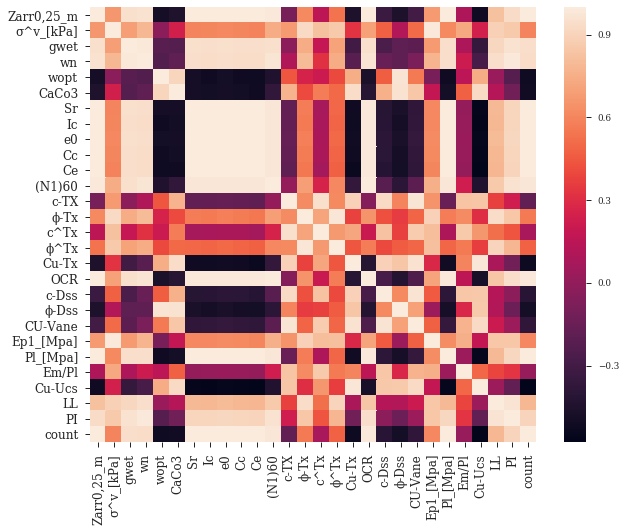

In [59]:
# sns.set_context("paper")
# plt.style.use('seabornpastel')
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})


f, ax = plt.subplots(figsize=(10,8))
corr = dfd.corr()
ax.tick_params(labelsize=12)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)


In [60]:
dfo = df2[dfdt.sort_values('count', ascending=False).index.tolist()].sort_values('count',ascending=False).copy()
dfo

,"Zarr0,25_m",σ^v_[kPa],count,(N1)60,PI,LL,wn,Ic,gwet,CU-Vane,OCR,Em/Pl,Pl_[Mpa],Ep1_[Mpa],e0,ϕ^Tx,c^Tx,Ce,Cc,ϕ-Tx,c-TX,Sr,Cu-Tx,CaCo3,Cu-Ucs,wopt,c-Dss,ϕ-Dss
531,41.00,403.8125,11,NaN,47.0,87.0,55.1,0.678723,16.82,NaN,1.600000,NaN,NaN,NaN,1.536,NaN,NaN,0.140,0.627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,16.75,223.2500,11,NaN,NaN,NaN,56.3,NaN,17.11,NaN,2.015677,NaN,NaN,NaN,NaN,28.0,80.0,NaN,NaN,14.0,110.0,1.00,156.454585,NaN,NaN,NaN,NaN,NaN
630,10.75,178.6250,11,NaN,NaN,NaN,39.4,NaN,18.38,NaN,2.687194,NaN,NaN,NaN,NaN,30.0,30.0,NaN,NaN,22.0,40.0,1.00,157.558352,NaN,NaN,NaN,NaN,NaN
629,7.75,139.5000,11,NaN,NaN,NaN,34.4,NaN,18.85,NaN,3.225806,NaN,NaN,NaN,NaN,24.0,72.0,NaN,NaN,22.0,75.0,0.98,142.411429,NaN,NaN,NaN,NaN,NaN
525,32.00,336.3125,11,NaN,31.0,58.0,33.2,0.800000,18.91,NaN,2.000000,NaN,NaN,NaN,0.937,NaN,NaN,0.048,0.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,5.50,64.0000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,0.75,13.5000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,24.00,203.5000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,12.50,141.6250,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# dfg=dfo.groupby('Zarr0,25_m').mean()
# print('The shape of the new dataframe is:',dfg.shape)
# dfg.describe()

dfg=dfo.copy()

In [ ]:
# dfg_1 = dfg.copy()

## Exploratory data analysis

Let's check how the variables are distributed

# Filling missing data by interpolation

One of the possibility to populate missing data is by means of interpolations. SInce we have lots of missing data we are obliged to start by using an unsupervised method of filling. Wi will do this for the following paramters:

- Atterberg Limits (LL,IP)
- Water content

Since interpolation may interfere with regression before doing that we regress the lines where we have most available information.


## Final dataframe setting up

The final dataframe will be based on:

- Insitu stress s'v
- Atterberg Limits (LL,IP) 
- Water content
- Corrected Nspt --> (N1)60
- Undrained shear strength from Triaxial Test
- Undrained shear strength from Vane Test
- Limit pressure from pressuremeter

In [ ]:
# Since we noticed that N160 and Cu-Tx are lognormal distributed we will use the log of Nspt
# dfg['(N1)60']=np.log10(dfg['(N1)60'])
# dfo['(N1)60']=np.log10(dfo['(N1)60'])
# dfg['Cu-Tx']=np.log10(dfg['Cu-Tx'])
# dfo['Cu-Tx']=np.log10(dfo['Cu-Tx'])




In [66]:
dfg.columns.tolist()

['σ^v_[kPa]', 'PI', 'LL', 'wn', 'OCR', 'Cu-Tx']

In [63]:
# we select the relevant columns only

dfg=dfg[['σ^v_[kPa]', 'PI', 'LL', 'wn','OCR','Cu-Tx']].copy()

## Fill missing values of NSTP by regression procedures

We know that the SPT are directly linked with undrained resistance and that this one is also directly linked with Atterberg Limits and water content. We will therefore fill missing (N1)60 values by regression.
First we need to check if there are lines that are filled with the wanted parameters:

- The regressand : (N1)60
- The regressors: 'σ^v_[kPa]', 'PI', 'LL', 'wn'

We find that in 36 lines we have full data to perform such regression.

In [64]:
dfg.describe()

,σ^v_[kPa],PI,LL,wn,OCR,Cu-Tx
count,596.000000,167.000000,167.000000,148.000000,57.000000,26.000000
mean,227.917911,44.017964,74.467066,39.515541,3.104768,186.439666
std,127.204534,12.795647,16.106866,8.598843,1.750037,73.251474
min,13.500000,11.000000,31.000000,20.600000,1.000000,68.744449
25%,123.843750,35.000000,65.500000,32.900000,2.000000,122.822503
50%,216.000000,44.000000,74.000000,38.250000,2.600000,202.969366
75%,308.500000,51.000000,83.000000,45.350000,3.372604,232.352324
max,609.750000,79.000000,109.000000,57.300000,10.490107,309.781238


In [67]:
dfg.sort_values('σ^v_[kPa]', inplace=True)
# interpolate forward

for i in dfg.columns.tolist():
    
    dfg[i].interpolate(method ='linear', limit_direction ='forward', inplace=True)

    # now interpolate backward
    dfg[i].interpolate(method ='linear', limit_direction ='backward', inplace=True)

# dfg.dropna(inplace=True)

In [68]:
# dfg['Pl_[Mpa]'] = dfg['Pl_[Mpa]']*1000

In [69]:
dfg.reset_index(inplace=True, drop=True)

In [70]:
dfg.describe()

,σ^v_[kPa],PI,LL,wn,OCR,Cu-Tx
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,227.917911,44.444631,75.228188,39.697903,3.320105,178.662751
std,127.204534,10.880546,13.952582,7.360926,1.769436,63.356279
min,13.500000,11.000000,31.000000,20.600000,1.000000,68.744449
25%,123.843750,37.778571,67.000000,34.000000,2.059225,136.729853
50%,216.000000,45.000000,75.500000,39.852083,2.839336,198.488117
75%,308.500000,50.587662,83.000000,45.000000,4.003481,226.100633
max,609.750000,79.000000,109.000000,57.300000,10.490107,309.781238


In [71]:
dfg.isnull().sum()

σ^v_[kPa]    0
PI           0
LL           0
wn           0
OCR          0
Cu-Tx        0
dtype: int64

In [72]:
dfg

,σ^v_[kPa],PI,LL,wn,OCR,Cu-Tx
0,13.50,34.000000,57.000000,28.0,5.730159,68.744449
1,13.50,36.363636,60.181818,28.4,5.730159,68.744449
2,16.00,38.727273,63.363636,28.8,5.730159,68.744449
3,27.00,41.090909,66.545455,29.2,5.730159,68.744449
4,27.00,43.454545,69.727273,29.6,5.730159,68.744449
...,...,...,...,...,...,...
591,555.00,47.000000,81.000000,45.0,1.400000,226.100633
592,555.75,47.000000,81.000000,45.0,1.400000,226.100633
593,572.25,47.000000,81.000000,45.0,1.400000,226.100633
594,583.50,47.000000,81.000000,45.0,1.400000,226.100633


In [73]:
dfg = dfg[(dfg['σ^v_[kPa]']<320)&(dfg['σ^v_[kPa]']>25)].copy()

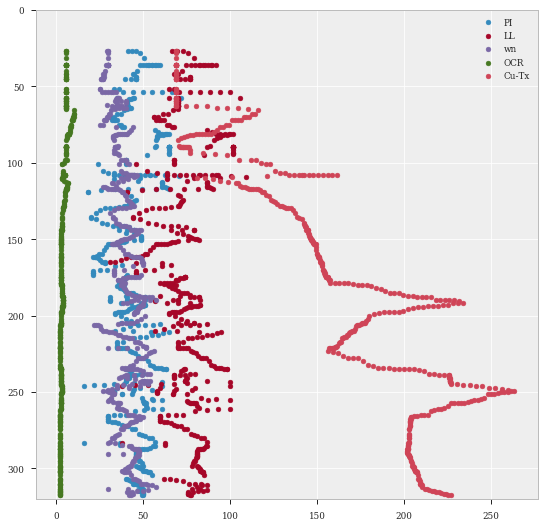

<Figure size 720x1080 with 0 Axes>

In [74]:
fig, ax = plt.subplots()

plt.figure(figsize(10,15))

for ii in np.arange(1,dfg.shape[1]):
    
    x_ = dfg.iloc[:,ii]
    y_ = dfg.iloc[:,0]
        
    ax.scatter(x_,y_,label=x_.name)
    ax.set_ylim(320,0)
    ax.legend()

#     plt.title(x_.name)

In [182]:
import scipy.stats as st
import statsmodels as sm
import matplotlib
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
#matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=10, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy]


    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf





Now that we regress SPT with available data we can regress in order to apply the regression on the interpolated data and be able to give completeness to the dataframe.

## Save the database as h5 py format
it requires pip intall tables
e import h5py

In [75]:
import h5py

dfg.to_hdf('dfg3_4.h5', key='losses')

# dfg = pd.read_hdf('dfg3.h5', key='losses')

## Define correlation between variables

Before running a regression the first thing do do is :

- Check the principal rules of validi of LR
   - Homoskedaticity
   - Errors non correlated with regressor
   - ...
   - ...
- Successively we have to discern the variables that are correlated with the regressand. In fact selecting too many variables may lead to overfitting or may lead to wrong estimation.

In [76]:
dfg.corr()['Cu-Tx'].sort_values()

OCR         -0.743295
PI          -0.157421
LL          -0.119543
wn           0.457898
σ^v_[kPa]    0.906756
Cu-Tx        1.000000
Name: Cu-Tx, dtype: float64

In [177]:
dfg

,σpv,pi,ll,wn,ocr,cutx
3,27.000,41.090909,66.545455,29.200000,5.730159,68.744449
4,27.000,43.454545,69.727273,29.600000,5.730159,68.744449
5,27.000,45.818182,72.909091,30.000000,5.730159,68.744449
6,28.000,48.181818,76.090909,30.000000,5.730159,68.744449
7,31.500,50.545455,79.272727,30.000000,5.730159,68.744449
...,...,...,...,...,...,...
460,315.875,50.000000,76.000000,41.933333,2.009089,221.478496
461,316.750,50.000000,76.000000,42.966667,2.018177,222.835221
462,317.000,50.000000,76.000000,44.000000,2.027266,224.191945
463,317.500,49.600000,77.466667,42.000000,2.036354,225.548670


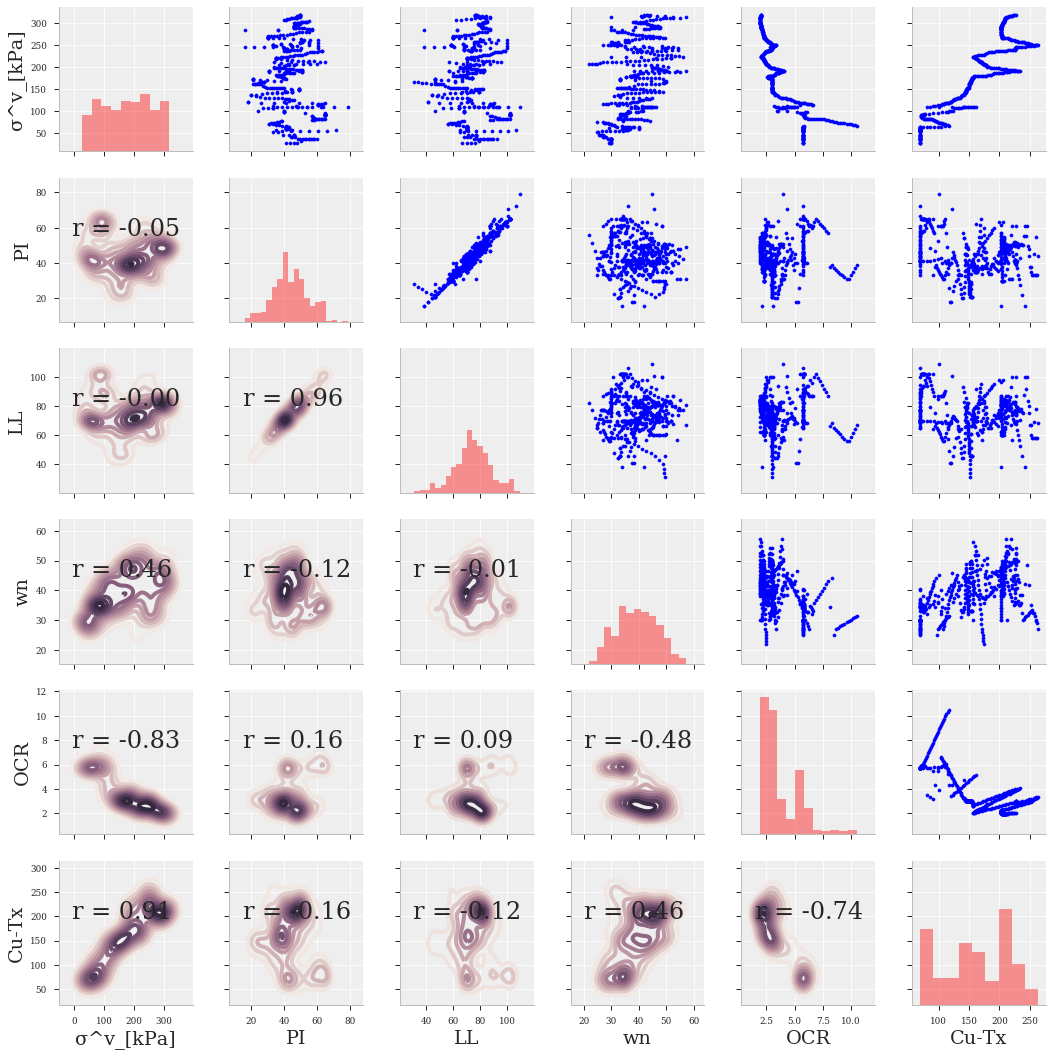

In [78]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(dfg)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'b')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

KeyboardInterrupt: 

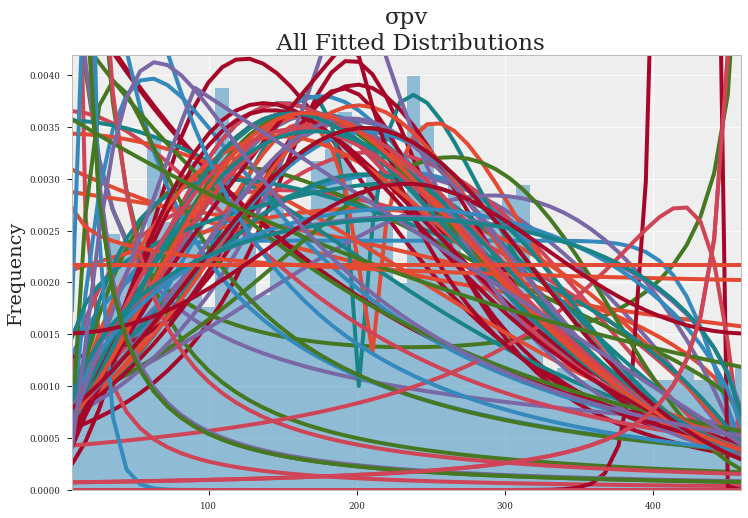

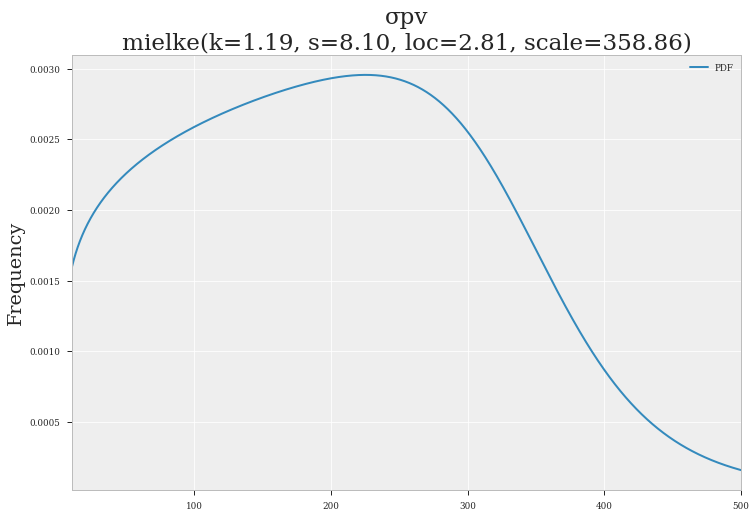

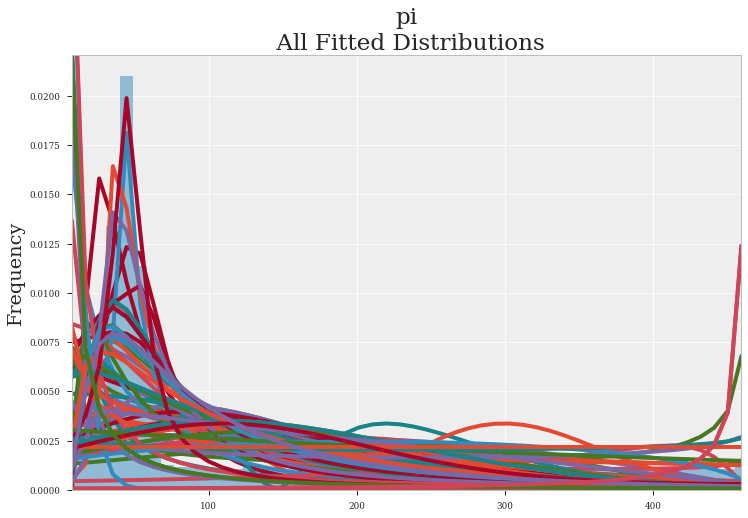

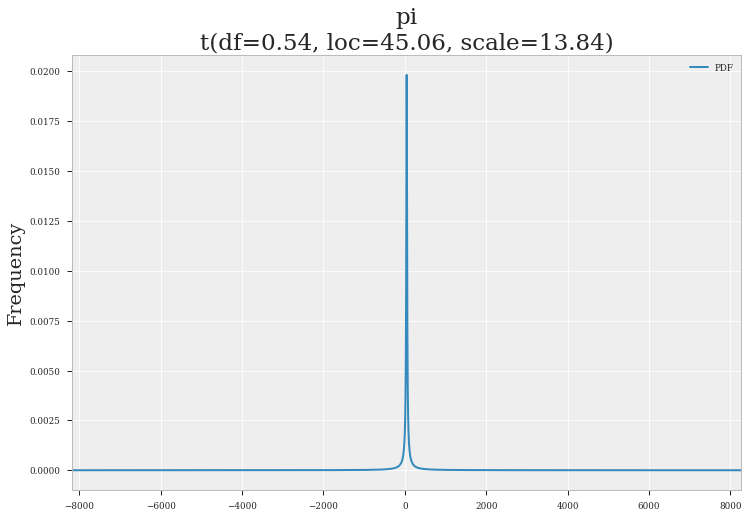

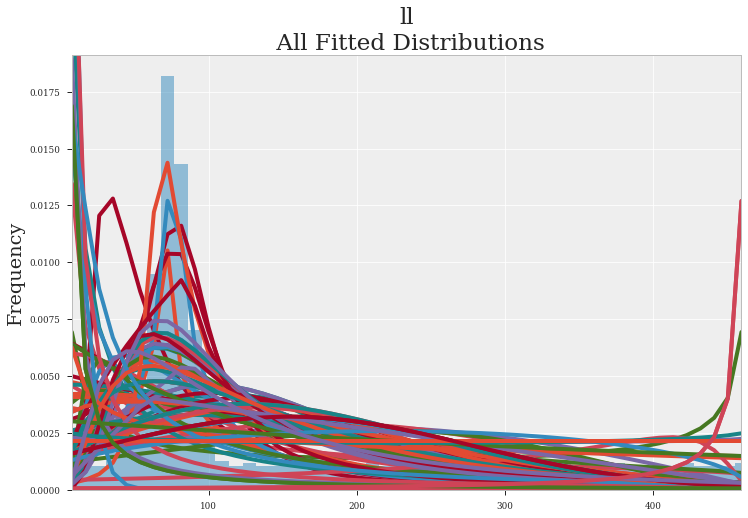

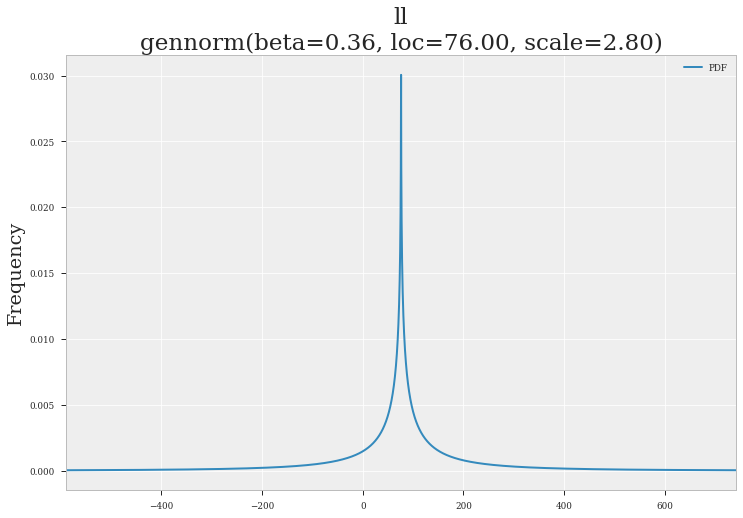

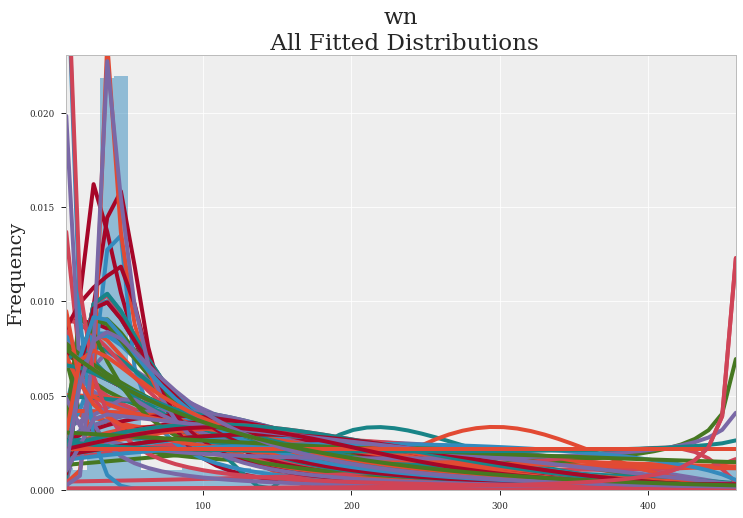

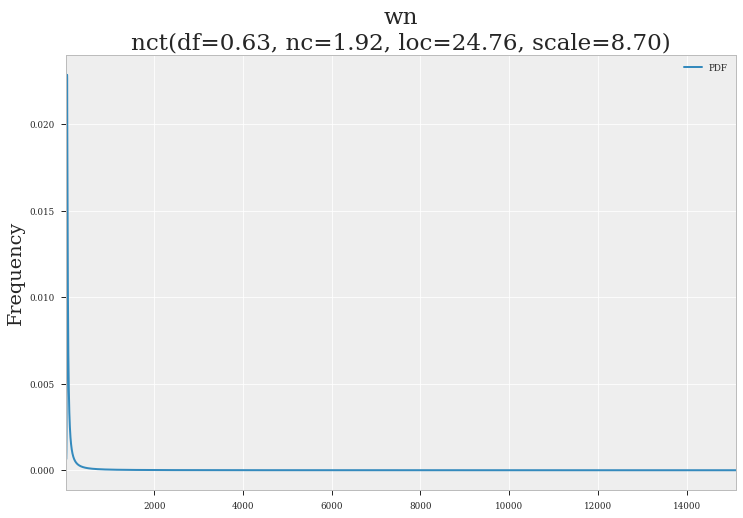

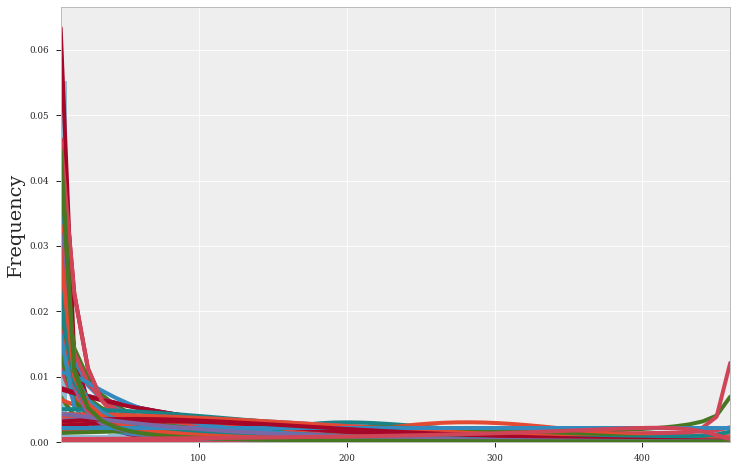

In [183]:
# Load data from statsmodels datasets

#data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

n_cols = dfg.shape[1]

for e in np.arange(0,n_cols,1):

    data = dfg.iloc[:,e].dropna().reset_index().copy()
    data =pd.Series(data.values.ravel())


    # Plot for comparison
    plt.figure(figsize=(12,8))
    ax2 = data.plot(kind='hist', bins=50, density=True, alpha=0.5)
    # Save plot limits
    dataYLim = ax2.get_ylim()

    # Find best fit distribution
    best_fit_name, best_fit_params = best_fit_distribution(data, 50, ax2)
    best_dist = getattr(st, best_fit_name)

    # Update plots
    ax2.set_ylim(dataYLim)
    ax2.set_title(dfg.columns[e] + u'\n All Fitted Distributions')
    ax2.set_xlabel('')
    ax2.set_ylabel('Frequency')

    # Make PDF with best params 
    pdf = make_pdf(best_dist, best_fit_params)

    # Display
    plt.figure(figsize=(12,8))
    ax1 = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
    dist_str = '{}({})'.format(best_fit_name, param_str)

    ax1.set_title(dfg.columns[e] + u'\n' + dist_str)
    ax1.set_xlabel('')
    ax1.set_ylabel('Frequency')

## Let's train the model

We will now use the package sklearn that envelop several machine learning algorithms. We will train some of them and we will check wich one is the most performing.

First of all we are going to split the data randomly between train and test data, by mean of a method enmbedded in the sklearn package. The parameters are set such that 5% of the data will be kept aside from training and will be used to check the godness of the model.


In [79]:
# crate a df with simple names otherwise pymc3 formula won't work
dfg.columns.tolist()

['σ^v_[kPa]', 'PI', 'LL', 'wn', 'OCR', 'Cu-Tx']

In [81]:
dfg.columns = ['σpv', 'pi', 'll', 'wn','ocr', 'cutx']

## MODEL WITH 1% OF TRAIN AND REDUCING TO -30m 

In [82]:
X_train, X_test, y_train, y_test = train_test_split(dfg.iloc[:,:-1], 
                                                    dfg.iloc[:,-1:], 
                                                    test_size = 0.9,
                                                    random_state=42)

In [83]:
X_train.describe()

,σpv,pi,ll,wn,ocr
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,176.303804,44.330336,74.698481,40.767391,3.788841
std,79.124268,9.815284,11.955194,6.702370,1.784387
min,44.100000,23.125000,48.375000,27.057143,1.934102
25%,109.650000,39.328571,68.000000,35.234848,2.648110
50%,179.500000,42.750000,74.777778,42.383333,3.000000
75%,243.531250,49.950000,81.290486,45.922917,5.001034
max,317.500000,65.000000,102.000000,53.250000,10.311352


In [84]:
X_test.describe()

,σpv,pi,ll,wn,ocr
count,416.000000,416.000000,416.000000,416.000000,416.000000
mean,176.851202,44.002677,74.058953,39.202404,3.745206
std,82.615302,10.964299,13.663894,7.213149,1.752833
min,27.000000,16.000000,31.000000,22.000000,1.920922
25%,108.000000,36.937500,66.672078,33.986538,2.396119
50%,180.000000,43.327273,74.000000,39.115000,3.000000
75%,246.281250,50.511364,82.363636,44.622500,5.499111
max,317.500000,79.000000,109.000000,57.300000,10.490107


For this regression task, we will use two standard metrics:

- Mean Absolute Error (MAE)

$$\begin{equation}
\frac{1}{n} \sum_{i=1}^{n} \lvert x_{i} - \bar{x_{i}}\lvert
\end{equation}$$

- Root Mean Squared Error (RMSE)

$$\begin{equation}
\sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_{i} - \bar{x_{i}})^2}
\end{equation}$$

In [85]:
# Calculate mae and rmse
def evaluate_predictions(predictions, real):
    predictions=np.array(predictions)  # correzione
    real=np.array(real)                # correzione
    mae = np.mean(abs(predictions - real))
    rmse = np.sqrt(np.mean((predictions - real) ** 2))
    
    return mae, rmse

In [86]:
# Naive baseline is the median
median_pred = y_train.median()
median_preds = [median_pred for _ in range(len(X_test))]
median_preds = pd.DataFrame(median_preds)
real = y_test

In [87]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, real)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 47.0060
Median Baseline RMSE: 55.5217


In [88]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [89]:
results = evaluate(X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\site-packages\ipykernel_launcher.py:28: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

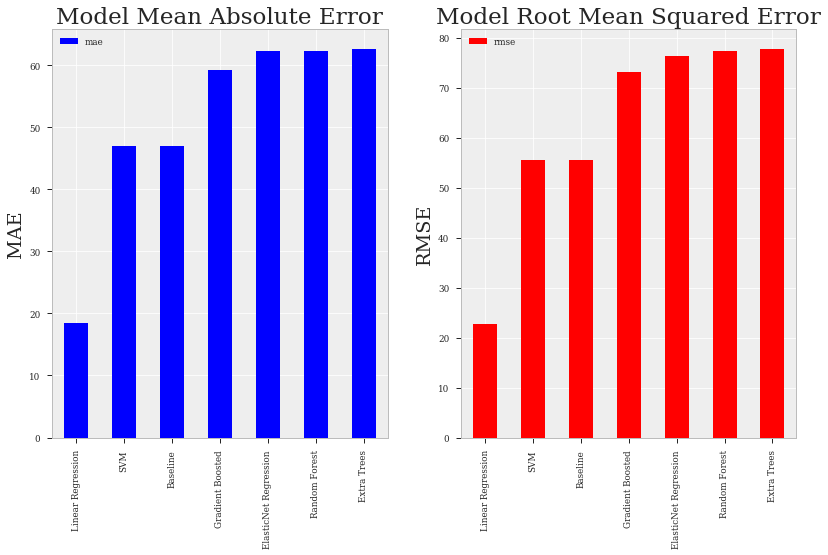

In [90]:
plt.figure(figsize=(12, 8))
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [91]:
results

,mae,rmse
Linear Regression,18.4594,22.706
ElasticNet Regression,62.2287,76.406
Random Forest,62.3588,77.3027
Extra Trees,62.663,77.754
SVM,47.0059,55.5211
Gradient Boosted,59.3146,73.1935
Baseline,47.006,55.5217


## Formula from Ordinary Least Squares Linear Regression

In [92]:
lr = LinearRegression()
lr.fit(np.array(X_train), np.array(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
lr.coef_ # sono 7 coefficienti attenzione doppio array([[]])
X_train.columns.tolist(),y_train.columns.tolist()

(['σpv', 'pi', 'll', 'wn', 'ocr'], ['cutx'])

In [94]:
lr.coef_[0],X_train.columns[:]

(array([ 0.66447446,  1.20908974, -1.30314334,  0.42793329,  2.38649814]),
 Index(['σpv', 'pi', 'll', 'wn', 'ocr'], dtype='object'))

In [95]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ols_formula = 'cutx=%0.1f+' % lr.intercept_
for i, col in enumerate(X_train.columns[:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[0][i], col)

' '.join(ols_formula.split(' ')[:-1]) #eliminate last '+' and add Log10 for SPT

'cutx=63.3+ 0.66 * σpv + 1.21 * pi + -1.30 * ll + 0.43 * wn + 2.39 * ocr'

## Implementing Bayesian Linear Regression

In [96]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'cutx ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[0:]])
formula

'cutx ~ σpv + pi + ll + wn + ocr'

Create Model in PyMC3 and Sample from Posterior.
We now build the model using the formula defined above and a normal distribution for the data likelihood. Then, we let a Markov Chain Monte Carlo algorithm draw samples from the posterior to approximate the posterior for each of the model parameters

In [98]:
# Context for the model
# pm stands for pymc3 
# try st.johnsonsb

# with pm.Model() as normal_model_fab_student: # using as ... irrilevant
    
with pm.Model() as modelbayes_t:
    
    # The prior for the model parameters will be a normal distribution
    
    familyt = pm.glm.families.StudentT(df = (int(y_train.shape[0])-1))
    familyn = pm.glm.families.Normal()
    
    Data=y_train.merge(X_train, left_index=True, right_index=True)
    
    # Creating the model requires a formula and data (and optionally a family)
    
    # pm.GLM.from_formula(formula, data = Data, family = family)
    # pm.GLM.from_formula(formula, data = Data) #senza family peggiora
    pm.GLM.from_formula(formula, data = Data) #senza family peggiora
    
    # Perform Markov Chain Monte Carlo sampling
    #normal_trace = pm.sample(draws=10000, chains = 2, tune = 2000, step=pm.NUTS(), start = pm.find_MAP(), family= familyt)
    
    normal_trace_t = pm.sample(draws=10000, chains = 2, tune = 2000, step=pm.NUTS(), start = pm.find_MAP(), family= familyt)
    

####  BELOW IS THE CODE FOR GAUSSIAN NORMAL INFERENCE

# with pm.Model() as normal_model:
    
#     # The prior for the model parameters will be a normal distribution
#     family = pm.glm.families.Normal()
    
#     Data=y_train.merge(X_train, left_index=True, right_index=True)
    
#     # Creating the model requires a formula and data (and optionally a family)
#     pm.GLM.from_formula(formula, data = Data, family = family)
    
#     # Perform Markov Chain Monte Carlo sampling
#     normal_trace = pm.sample(draws=2000, chains = 2, tune = 500) #draws=2000, chains = 2, tune = 500

C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -254.62, ||grad|| = 0.033541: 100%|█████████████████████████████████████████| 103/103 [00:00<00:00, 2739.57it/s]
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [sd, ocr, wn, ll, pi, σpv, Intercept]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 24000/24000 [02:51<00:00, 140.32draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [99]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.summary(trace)['mean']):
        ax[i, 0].annotate('{:0.4f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

In [100]:
pm.summary(normal_trace_t)

C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\site-packages\pymc3\stats.py:982: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,63.955781,50.719134,0.506339,-33.268272,166.230660,8759.344893,0.999998
σpv,0.663999,0.087514,0.000783,0.493058,0.838326,11493.695381,1.000203
pi,1.242627,1.787049,0.017928,-2.193116,4.851051,8246.225403,0.999960
ll,-1.331450,1.434463,0.014246,-4.290139,1.382430,8292.911133,0.999973
wn,0.433013,0.688749,0.006425,-0.900544,1.821765,13418.915010,1.000079
ocr,2.361070,4.099215,0.038824,-5.822668,10.211959,10170.218134,1.000038
sd,25.687607,2.921302,0.027124,20.382071,31.625919,11857.393447,0.999952


C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\site-packages\pymc3\stats.py:982: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


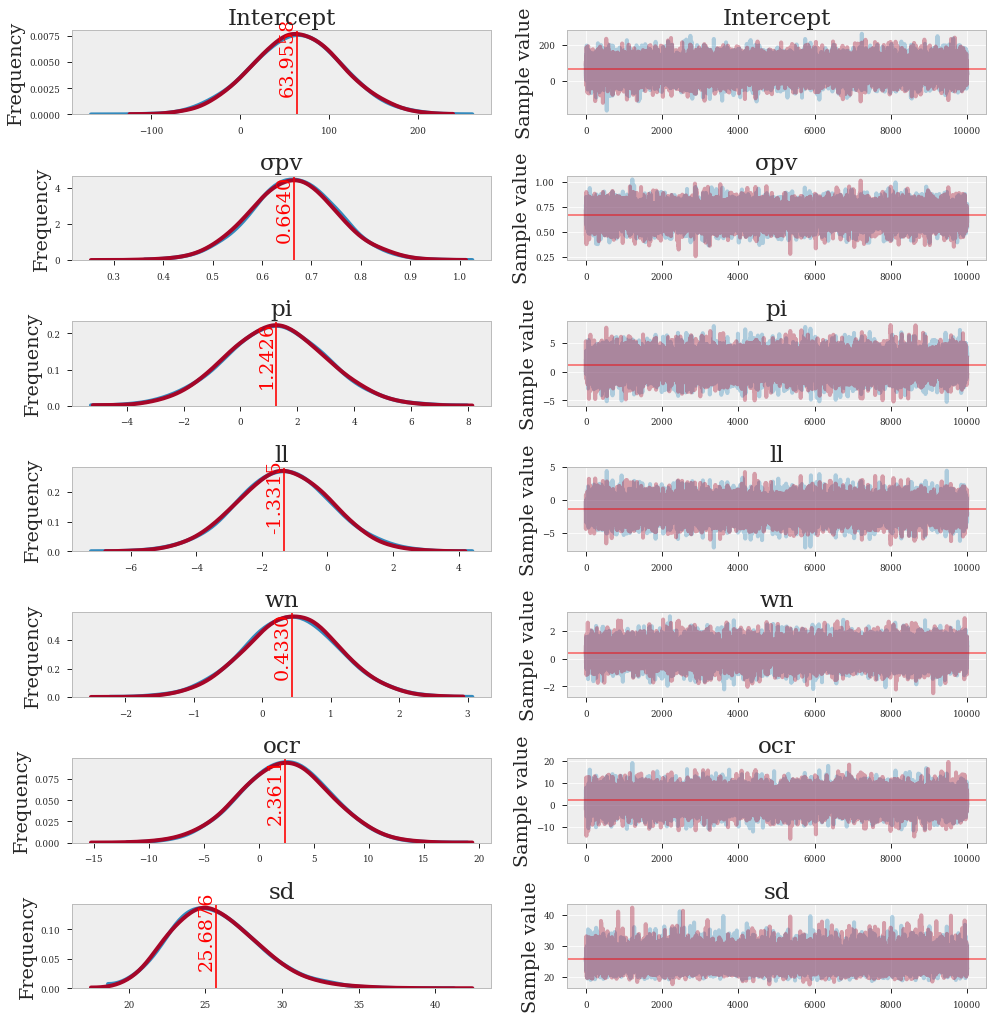

In [101]:
plot_trace(normal_trace_t);
# or the embedded function is : pm.traceplot(normal_trace);

In [ ]:
# import arviz as az
# se non funziona il plot sopra
# az.plot_trace(normal_trace);

C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\site-packages\pymc3\plots\forestplot.py:318: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  ticks.tick1On = False
C:\ProgramData\Anaconda3_1\envs\pymc3venv\lib\site-packages\pymc3\plots\forestplot.py:319: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  ticks.tick2On = False


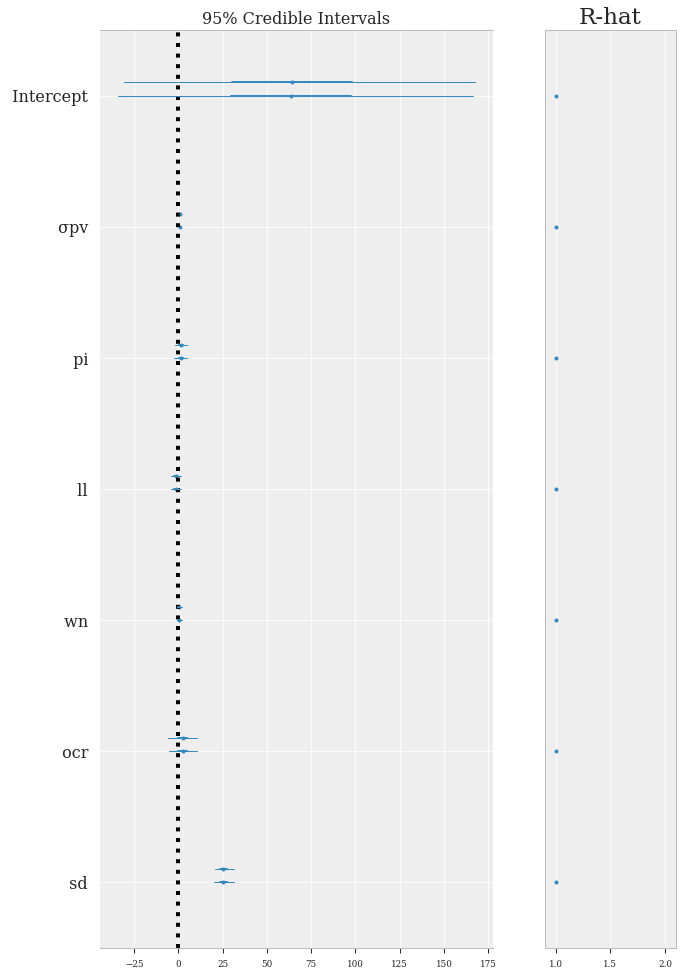

In [102]:
pm.forestplot(normal_trace_t);

In [106]:
model_formula = 'Cu-Tx = '
for variable in normal_trace_t.varnames:
    model_formula += ' %0.4f * %s +' % (np.mean(normal_trace_t[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Cu-Tx =  63.9558 * Intercept + 0.6640 * σpv + 1.2426 * pi + -1.3315 * ll + 0.4330 * wn + 2.3611 * ocr + 3.2397 * sd_log__ + 25.6876 * sd'

## We compare mae and rmse with other models

In [109]:
coeffs = pm.summary(normal_trace_t).iloc[:-1,0]

clmn_coeff = coeffs.index.tolist()

X_test_ = X_test.copy()

X_test_[clmn_coeff[0]]=1
X_test_ = X_test_[clmn_coeff].copy()  # ordino il dataframe con lo stesso ordine del trace

resultsbayes = pd.DataFrame(index = X_test.index, columns = ['estimate'])

for row in X_test_.iterrows():
        resultsbayes.loc[row[0], 'estimate'] = np.dot(np.array(coeffs), np.array(row[1]))
        
resultsbayes

,estimate
228,169.031
33,77.6546
42,90.2877
225,159.567
127,118.412
...,...
169,136.326
331,209.272
457,249.835
137,127.85


In [110]:
predictions = np.array(resultsbayes.estimate)

# Metrics
mae = np.mean(abs(predictions - np.array(y_test)))
rmse = np.sqrt(np.mean((predictions - np.array(y_test)) ** 2))

# Insert results into the dataframe
model_name = 'Bayesian lr'
results.loc[model_name, :] = [mae, rmse]
results

,mae,rmse
Linear Regression,18.4594,22.706
ElasticNet Regression,62.2287,76.406
Random Forest,62.3588,77.3027
Extra Trees,62.663,77.754
SVM,47.0059,55.5211
Gradient Boosted,59.3146,73.1935
Baseline,47.006,55.5217
Bayesian lr,62.3075,76.4971


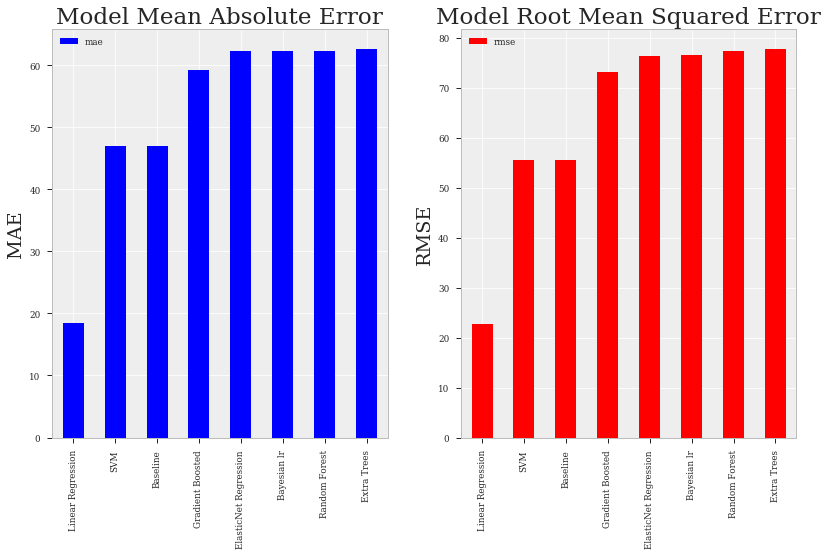

In [111]:
plt.figure(figsize=(12, 8))
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [112]:
modelbayes_t.vars

[Intercept, σpv, pi, ll, wn, ocr, sd_log__]

In [114]:
Theta_intercept = normal_trace_t.get_values('Intercept')
Theta_σpv = normal_trace_t.get_values('σpv')
Theta_pi = normal_trace_t.get_values('pi')
Theta_ll = normal_trace_t.get_values('ll')
Theta_wn = normal_trace_t.get_values('wn')
Theta_ocr = normal_trace_t.get_values('ocr')

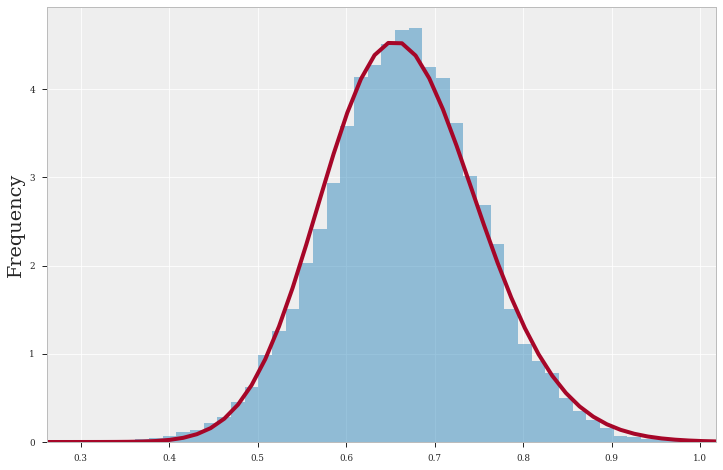

In [181]:
data = pd.Series(Theta_σpv)
bins = 50

plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=bins, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

y, x = np.histogram(data, bins=bins, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

# Distributions to check
DISTRIBUTIONS = [        
    st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
    st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy]

# Best holders
best_distribution = st.gausshyper
best_params = (0.0, 1.0)
best_sse = np.inf


# fit dist to data
distribution = DISTRIBUTIONS[0]
params = distribution.fit(data)

# Separate parts of parameters
arg = params[:-2]
loc = params[-2]
scale = params[-1]

arg,loc,scale

# Calculate fitted PDF and error with fit in distribution
pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
sse = np.sum(np.power(y - pdf, 2.0))

pd.Series(pdf, x).plot(ax=ax)

## Make Predictions from Model

In [ ]:
# Make a new prediction from the test set and compare to actual value
def test_model(trace, test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation['cutx']
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('cutx').copy()
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of grade
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure(figsize=(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual grade
    plt.vlines(x = actual, ymin = 0, ymax = 5, 
               linestyles = '--', colors = 'red',
               label = 'True cutx',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Grade'); plt.ylabel('Density');
    
    # Prediction information
    print('True cutx = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

In [ ]:
Data_test=y_test.merge(X_test, left_index=True, right_index=True)

In [ ]:
test_model(normal_trace, Data_test.iloc[4])

## Model Variable Effects

We can use the function pm.plot_posterior_predictive_glm to see the effect in changing one variable. This takes a range of values to use for the variable, a linear model, and a number of samples. The function evaluates the linear model across the range of values for the number of samples. Each time, it draws a different set of parameters from the trace. This gives us an indication of the effect of a single variable and also the uncertainty in the model estimates. To see the effect of a single variable, we hold the others constant at their median values.

In [ ]:
# Examines the effect of changing a single variable
# Takes in the name of the variable, the trace, and the data

def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['Intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
    plt.figure(figsize=(6, 6))
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('cutx', size = 16)
    plt.title("Posterior of cutx vs %s" % query_var, size = 18)
    plt.show()

In [ ]:
model_effect('ll', normal_trace, X_train)

In [ ]:
model_effect('σpv', normal_trace, X_train)

In [ ]:
model_effect('pi', normal_trace, X_train)

There is some variation between the t-distribution estimates and those from the normal distribution for the data likelihood.Choosing appropriate priors is one of the hardest aspect of Bayesian Modeling, but we can get around that by having more data. As the amount of data the model learns from increases, the prior has less of an effect because each time the posterior is updated based on the new data. Essentially machine learning models perform inference with no priors, basing the final model entirely on the data. In the case of limited samples, Bayesian Inference can be a better method for building models because it provides a reasonable estimate in situations with few data points (as long as the prior is reasonable)

# Conclusions

In this notebook we looked at using Bayesian Linear Regression to predict student performance based on six factors. Rather than specify probabilities for the Bayesian network which is basically impossible for continuous variables, we framed the problem as a machine learning task. In addition to the standard machine learning models that learn from observations, we also used Bayesian Linear Regression to create a model mapping the features (student characteristics) to the targets (final grade). The advantages of Bayesian Linear Regression are that if we use sensible priors, we can still get a decent estimate with few samples, and the final weights are not a single number, but a distribution componsed of every sample drawn during the sampling run. We can then make predictions using all the sampled weights to form a distribution of expected values rather than a single answer. 

The Bayesian  Linear Regression did not perform as well as the other methods in terms of the two metrics we choose. This might not be the ideal case for a Bayesian inference approach but we saw that Bayesian Linear Regression produced intuitive estimates for the model weights and gave predictions for new students that align with our expectations for the factors influencing student performance. To summarize, although Bayesian Linear Regression did not outperform the standard machine learning methods, it gave us a chance to learn another tool for use in evaluating and making sense of data. It's always a positive to have more skills that you can deploy as needed!

## Additional works

- Redo the job by plotting multy graph without log(spt) and log(cutx) in order to present the exploratory data analysis speaking about that graph
- Redo the analysis missing data by relating all the variables to s'v or 'z'
- Redo the analysis missing data by doing only the interpolate function
- Use the best from the above
- This is to solve the problem of inverse correlated cu-vane with cu-tx and inverse with pl that is strange
- Redo the analysis with bayesian t-student distribution
- Show that the Bayesian anlysis is the best we can use we we do not dispose of a lot of data
- Take a large amount of data and do the linear regression that will show a very low error estimate
- Take a small part of the X-test and use it to perform1:
    - Bayesian analysis
    - Linear Regression
- Show that Bayesian is better than linear regression when we do not dispose of a lot of data
    - Redo the analysis by changing the splittin part 
    
- Redo the Pymc3 analysis with student
- Search a better distribution for cutx with automatic distribution fitter 
- Redo the Pymc3 analysis with the best fit distribution
- Try not to fill missing data but using a limited number of row but with full data each


## Verifiche

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
mae_lr = np.mean(abs(np.array(predictions_lr) - np.array(y_test)))
rmse_lr = np.sqrt(np.mean((np.array(predictions_lr) - np.array(y_test)) ** 2))
mae_lr, rmse_lr

In [ ]:
mae_lr1 = np.mean(abs(np.array(resultsbayes.estimate) - np.array(y_test)))
rmse_lr1 = np.sqrt(np.mean((np.array(resultsbayes.estimate) - np.array(y_test)) ** 2))
mae_lr1, rmse_lr1

In [ ]:
model_lr.intercept_,model_lr.coef_

In [ ]:
pm.summary(normal_trace)['mean']

In [ ]:
modelbayes.model   # questi sono i parametri di base che ti mette quando usi GLM

## calcolo manualemente mae da lregress

In [ ]:
coef_lr = model_lr.intercept_.tolist()
coef_lr.extend(model_lr.coef_.tolist()[0])
coef_lr

In [ ]:
coeffs = np.array(coef_lr)

X_test_ = X_test.copy()

X_test_[clmn_coeff[0]]=1
X_test_ = X_test_[clmn_coeff].copy()  # ordino il dataframe con lo stesso ordine del trace

resultsbayes = pd.DataFrame(index = X_test.index, columns = ['estimate'])

for row in X_test_.iterrows():
        resultsbayes.loc[row[0], 'estimate'] = np.dot(np.array(coeffs), np.array(row[1]))
        

predictions = np.array(resultsbayes.estimate)

# Metrics
mae = np.mean(abs(predictions - np.array(y_test)))
rmse = np.sqrt(np.mean((predictions - np.array(y_test)) ** 2))

# Insert results into the dataframe
model_name = 'linear'
results.loc[model_name, :] = [mae, rmse]
results